In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#to get the connection 
init_notebook_mode(connected=True)
cf.go_offline()


In [116]:
df = pd.read_csv("heart_disease_dataset.csv")

In [117]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All Columns are integer except for "oldpeak" which is float

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

There are total 14 columns in the dataset are as follows:
1) age: The person's age in years
2) sex: person's gender (male = 1, female = 0) 
3) cp: chest pain type: -- Value 1: typical angina
                        -- Value 2: atypical angina
                        -- Value 3: non-anginal pain
                        -- Value 4: asymptomatic
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5) chol: serum cholestoral in mg/dl
6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
7) restecg: resting electrocardiographic results:
                        -- Value 0: normal
                        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8) thalach: maximum heart rate achieved
9) exang: exercise induced angina (1 = yes; 0 = no)
10) oldpeak: ST depression induced by exercise relative to rest
11) slope:  the slope of the peak exercise ST segment
                        -- Value 1: upsloping
                        -- Value 2: flat
                        -- Value 3: downsloping
12) ca: number of major vessels (0-3) colored by flourosopy
13) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14) num: diagnosis of heart disease (angiographic disease status)
                        -- Value 0: < 50% diameter narrowing
                        -- Value 1: > 50% diameter narrowing

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There is no Null values in this dataset

In [8]:
df.duplicated().sum()

0

There is no duplicates values in the dataset

In [118]:
def heart_disease(row):
    if row == 0:
        return 'Absence'
    elif row == 1:
        return 'Presence'
    
def sex_col(row):
    if row == 0:
        return 'female'
    elif row == 1:
        return 'male'

def age_range(row):
    if row>=29 and row<40:
        return 'Young age'
    elif row>=40 and row<55:
        return 'Middle age'
    elif row>=55:
        return 'Old age'

In [119]:
df['Heart_disease'] = df['num'].apply(heart_disease)

In [120]:
df['sex'] = df['sex'].apply(sex_col)

In [121]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease
0,63,male,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,male,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,male,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,male,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,female,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence


Heart_disease column (Absence = 0, presence = 1)

In [122]:
hd=df.groupby('Heart_disease').size()
hd

Heart_disease
Absence     164
Presence    139
dtype: int64

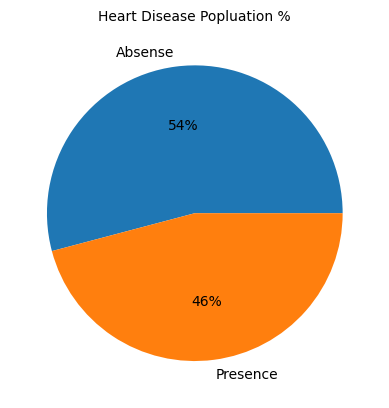

In [46]:
plt.pie(hd,labels=['Absense','Presence'],autopct="%0.0f%%")
plt.title("Heart Disease Popluation %",fontsize=10)
plt.show()

<Axes: xlabel='Heart_disease', ylabel='count'>

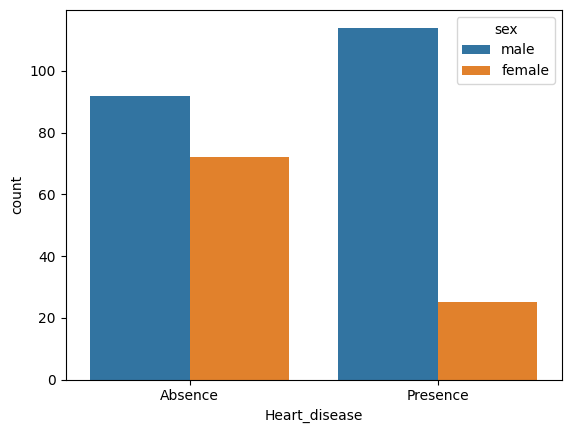

In [67]:

sns.countplot(data=df,x='Heart_disease',hue='sex')

Males are more prone to heart disease

In [123]:
df.groupby('Heart_disease')['sex'].value_counts()

Heart_disease  sex   
Absence        male       92
               female     72
Presence       male      114
               female     25
Name: sex, dtype: int64

Male who has presence of heart disease : 114
// Female who has presence of heart disease : 25

Male who has absense of heart disease : 92
// Female who has absense of heart disease : 72

<Axes: xlabel='age', ylabel='count'>

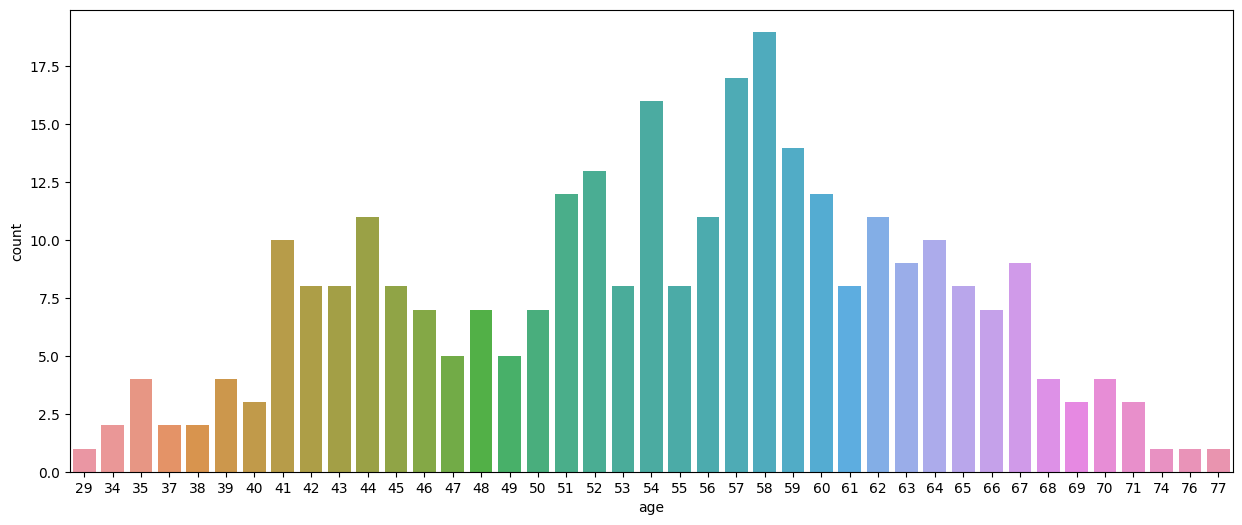

In [124]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='age')


We can convert age column into sections as younger, elder, and older

In [125]:
min=df['age'].min()
max=df['age'].max()
avg= df['age'].mean()
print(f" minimum age is {min} \n maximum age is {max} \n average age is {avg}")

 minimum age is 29 
 maximum age is 77 
 average age is 54.43894389438944


In [126]:
young_age=df[(df['age']>=29) & (df['age']<40)].value_counts().sum()
elder_age=df[(df['age']>=40) & (df['age']<55)].value_counts().sum()
old_age= df[(df['age']>55)].value_counts().sum()
print(f" younger : {young_age} \n elder : {elder_age} \n older : {old_age}")

 younger : 15 
 elder : 128 
 older : 152


In [127]:
df['age_category'] = df['age'].apply(age_range)

<Axes: xlabel='age_category', ylabel='count'>

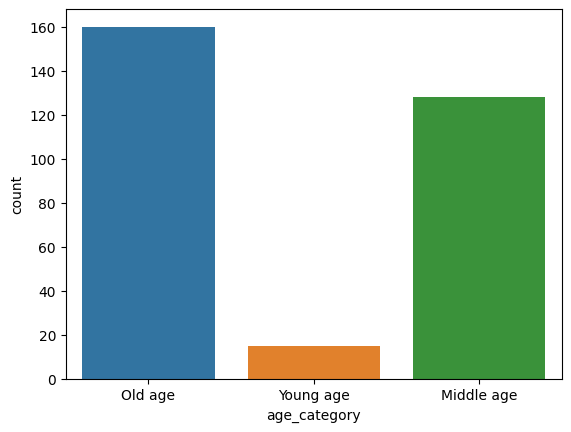

In [129]:
sns.countplot(data=df,x='age_category')

<Axes: xlabel='Heart_disease', ylabel='count'>

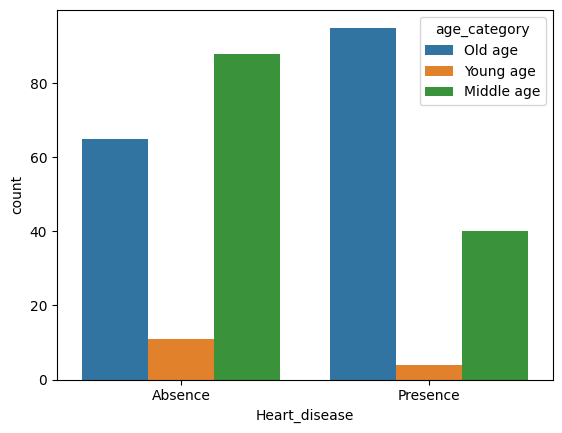

In [142]:
sns.countplot(data=df, x='Heart_disease',hue='age_category')

There are maximum number of old age people and least number of young people affected by heart disease in the population

In [131]:
df.groupby('age_category')['Heart_disease'].value_counts()

age_category  Heart_disease
Middle age    Absence          88
              Presence         40
Old age       Presence         95
              Absence          65
Young age     Absence          11
              Presence          4
Name: Heart_disease, dtype: int64

Text(0.5, 1.0, 'Gender based age category')

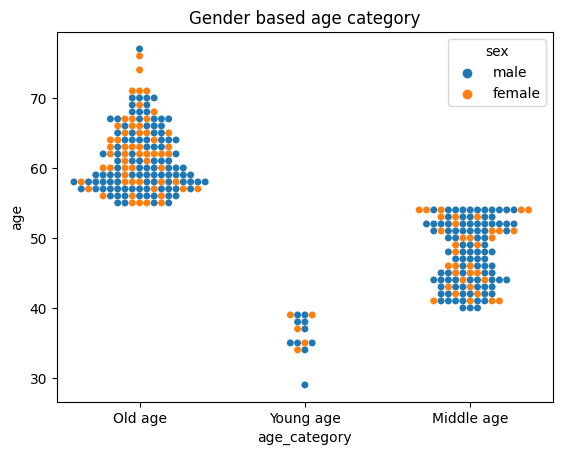

In [141]:
sns.swarmplot(data = df, x='age_category', y='age', hue='sex')
plt.title("Gender based age category")

Number of males are more in Middle age